In [2]:
import pandas as pd
import os
import numpy as np
import pandas_profiling

# This line is needed to display plots inline in Jupyter Notebook
%matplotlib inline

# Required for basic python plotting functionality
import matplotlib.pyplot as plt

# Required for formatting dates later in the case
import datetime
import matplotlib.dates as mdates

# Required to display image inline
from IPython.display import Image

# Advanced plotting functionality with seaborn
import seaborn as sns
sns.set(style="whitegrid") # can set style depending on how you'd like it to look

import folium  #needed for interactive map
from folium.plugins import HeatMap

import geopandas
from shapely.geometry import Polygon
from shapely.geometry import Point
from geopandas import GeoDataFrame

In [17]:
path = 'DataSet/Original'
file = 'weather.csv'

weather = pd.read_csv(path + '/' + file, sep = ',', doublequote = True)

In [18]:
weather.head()

,date,max_temp,min_temp,avg_temp,precipitation,snowfall,snow_depth,location,latitude,longitude
0,1/1/14,34,24,29.0,0,0,0,JFK,40.64749,-73.779982
1,1/2/14,33,19,26.0,0.13,2.4,0,JFK,40.64749,-73.779982
2,1/3/14,19,9,14.0,0.22,5.5,7,JFK,40.64749,-73.779982
3,1/4/14,31,3,17.0,0,0,7,JFK,40.64749,-73.779982
4,1/5/14,49,23,36.0,0.1,,6,JFK,40.64749,-73.779982


In [19]:
weather['date'] = pd.to_datetime(weather['date'], format = '%m/%d/%y')

In [20]:
weather.head()

,date,max_temp,min_temp,avg_temp,precipitation,snowfall,snow_depth,location,latitude,longitude
0,2014-01-01,34,24,29.0,0,0,0,JFK,40.64749,-73.779982
1,2014-01-02,33,19,26.0,0.13,2.4,0,JFK,40.64749,-73.779982
2,2014-01-03,19,9,14.0,0.22,5.5,7,JFK,40.64749,-73.779982
3,2014-01-04,31,3,17.0,0,0,7,JFK,40.64749,-73.779982
4,2014-01-05,49,23,36.0,0.1,,6,JFK,40.64749,-73.779982


In [21]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from shapely.geometry import Point, shape
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

In [22]:
weather['precipitation'] = np.where(weather['precipitation'].astype(str) == ' ', np.nan, weather['precipitation'])
weather['snowfall'] = np.where(weather['snowfall'].astype(str) == ' ', np.nan, weather['snowfall'])
weather['snow_depth'] = np.where(weather['snow_depth'].astype(str) == ' ', np.nan, weather['snow_depth'])

In [24]:
print(weather.shape)
weather.isnull().sum()

(2190, 10)


date               0
max_temp           0
min_temp           0
avg_temp           0
precipitation    237
snowfall          91
snow_depth        24
location           0
latitude           0
longitude          0
dtype: int64

In [8]:
my_imputer = IterativeImputer(random_state=0, estimator = DecisionTreeRegressor())
precipitation_imp = my_imputer.fit_transform(weather.loc[:,['avg_temp','precipitation']])
precipitation_imp = pd.DataFrame(precipitation_imp)
precipitation_imp.columns = ['avg_temp','precipitation']

C:\Users\johns\Anaconda3\envs\DS4A_test\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


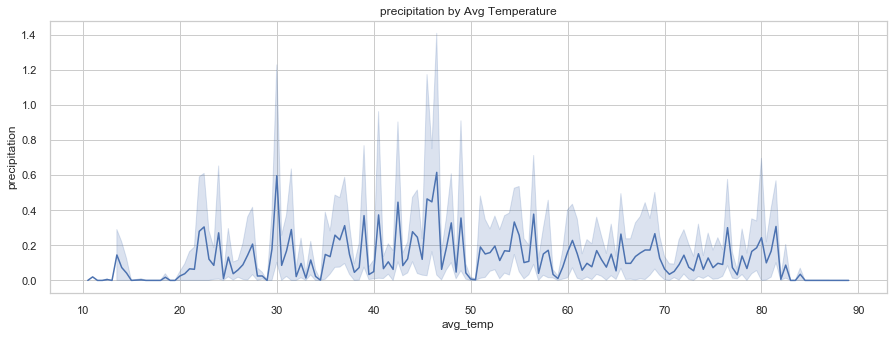

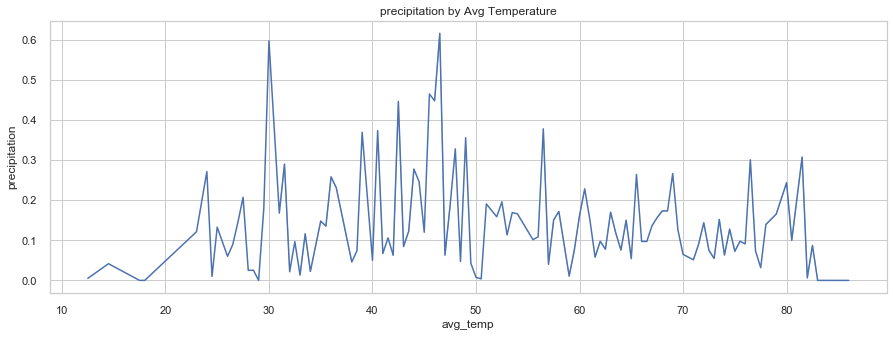

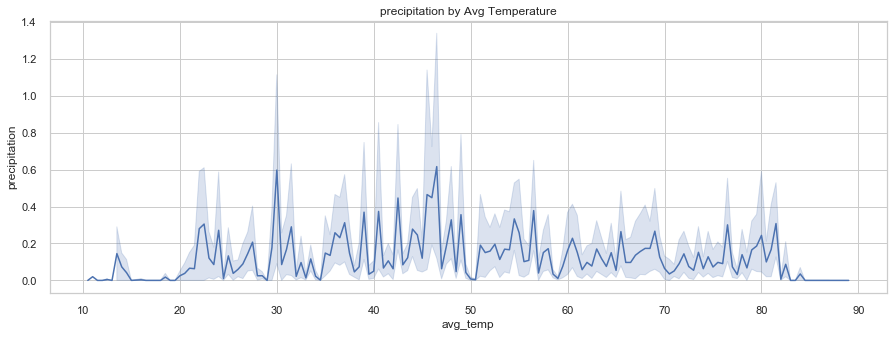

In [9]:
df = weather.loc[:,['avg_temp','precipitation']].dropna()
df['precipitation'] = df['precipitation'].astype(float)

fig, ax = plt.subplots(figsize=(15,5))
m = sns.lineplot(x="avg_temp", y="precipitation", data=df, ax=ax)
ax.set(xlabel='avg_temp', ylabel='precipitation')
#ax.set_xticks(np.arange(0, 24,1))
#plt.xticks(rotation=90);
plt.xticks
#plt.ylim(0, 18000)
plt.title('precipitation by Avg Temperature');

df = precipitation_imp.loc[weather['precipitation'].isna()]
df['precipitation'] = df['precipitation'].astype(float)
fig, ax = plt.subplots(figsize=(15,5))
m = sns.lineplot(x="avg_temp", y="precipitation", data=df, ax=ax)
ax.set(xlabel='avg_temp', ylabel='precipitation')
#ax.set_xticks(np.arange(0, 24,1))
#plt.xticks(rotation=90);
plt.xticks
#plt.ylim(0, 18000)
plt.title('precipitation by Avg Temperature');

df = precipitation_imp
df['precipitation'] = df['precipitation'].astype(float)
fig, ax = plt.subplots(figsize=(15,5))
m = sns.lineplot(x="avg_temp", y="precipitation", data=df, ax=ax)
ax.set(xlabel='avg_temp', ylabel='precipitation')
#ax.set_xticks(np.arange(0, 24,1))
#plt.xticks(rotation=90);
plt.xticks
#plt.ylim(0, 18000)
plt.title('precipitation by Avg Temperature');

In [10]:
my_imputer = IterativeImputer(random_state=0, estimator = DecisionTreeRegressor())
snowfall_imp = my_imputer.fit_transform(weather.loc[:,['avg_temp','snowfall']])
snowfall_imp = pd.DataFrame(snowfall_imp)
snowfall_imp.columns = ['avg_temp','snowfall']

C:\Users\johns\Anaconda3\envs\DS4A_test\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


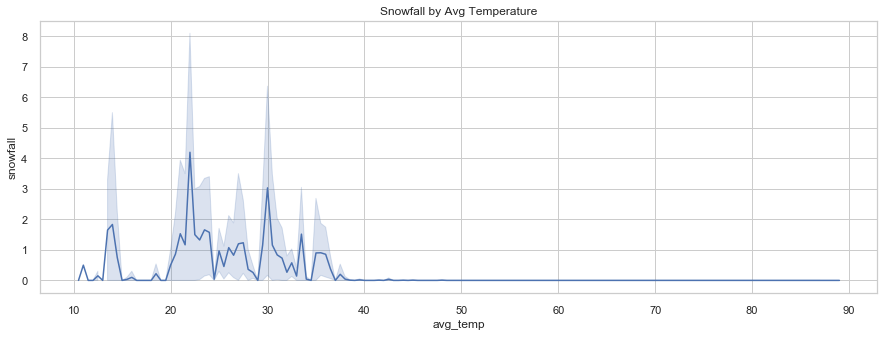

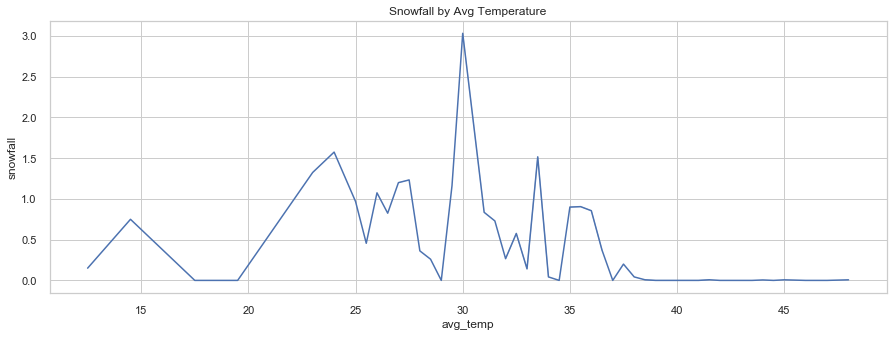

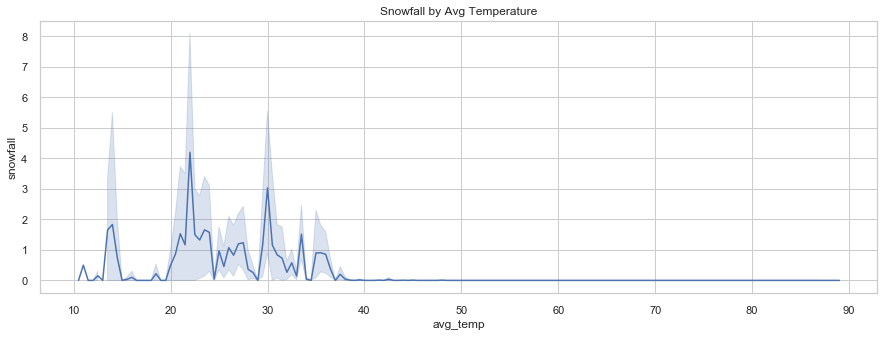

In [11]:
df = weather.loc[:,['avg_temp','snowfall']].dropna()
df['snowfall'] = df['snowfall'].astype(float)

fig, ax = plt.subplots(figsize=(15,5))
m = sns.lineplot(x="avg_temp", y="snowfall", data=df, ax=ax)
ax.set(xlabel='avg_temp', ylabel='snowfall')
#ax.set_xticks(np.arange(0, 24,1))
#plt.xticks(rotation=90);
plt.xticks
#plt.ylim(0, 18000)
plt.title('Snowfall by Avg Temperature');

df = snowfall_imp.loc[weather['snowfall'].isna()]
df['snowfall'] = df['snowfall'].astype(float)
fig, ax = plt.subplots(figsize=(15,5))
m = sns.lineplot(x="avg_temp", y="snowfall", data=df, ax=ax)
ax.set(xlabel='avg_temp', ylabel='snowfall')
#ax.set_xticks(np.arange(0, 24,1))
#plt.xticks(rotation=90);
plt.xticks
#plt.ylim(0, 18000)
plt.title('Snowfall by Avg Temperature');

df = snowfall_imp
df['snowfall'] = df['snowfall'].astype(float)
fig, ax = plt.subplots(figsize=(15,5))
m = sns.lineplot(x="avg_temp", y="snowfall", data=df, ax=ax)
ax.set(xlabel='avg_temp', ylabel='snowfall')
#ax.set_xticks(np.arange(0, 24,1))
#plt.xticks(rotation=90);
plt.xticks
#plt.ylim(0, 18000)
plt.title('Snowfall by Avg Temperature');

In [12]:
my_imputer = IterativeImputer(random_state=0, estimator = DecisionTreeRegressor())
snow_depth_imp = my_imputer.fit_transform(weather.loc[:,['avg_temp','snow_depth']])
snow_depth_imp = pd.DataFrame(snow_depth_imp)
snow_depth_imp.columns = ['avg_temp','snow_depth']

C:\Users\johns\Anaconda3\envs\DS4A_test\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


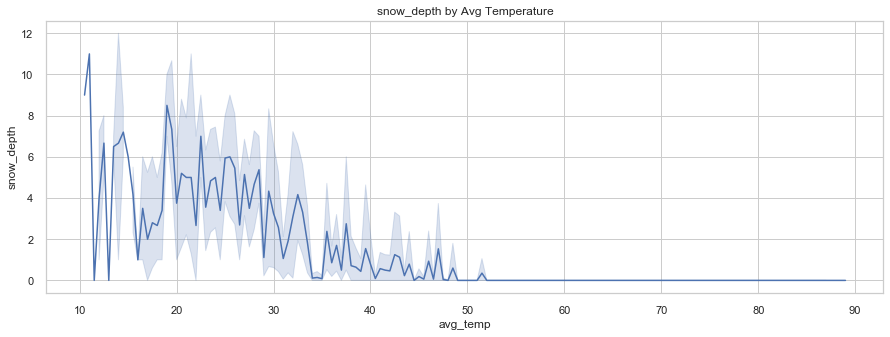

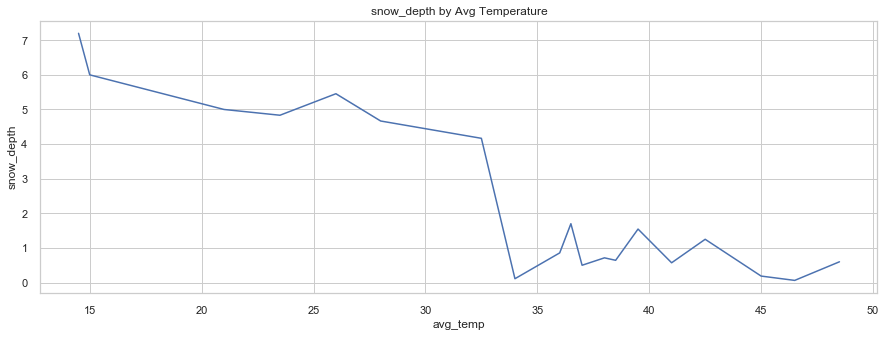

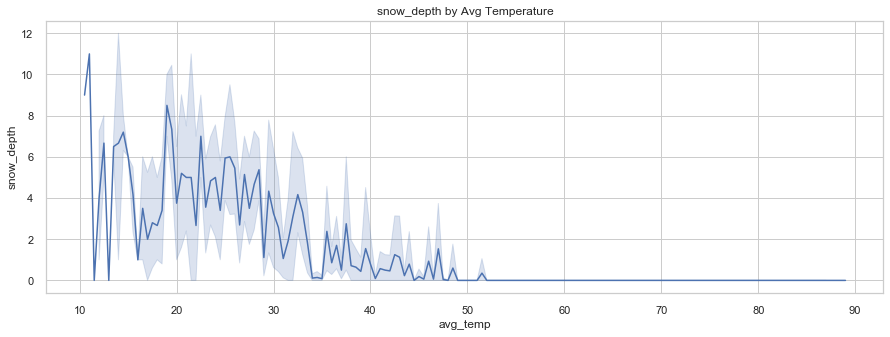

In [13]:
df = weather.loc[:,['avg_temp','snow_depth']].dropna()
df['snow_depth'] = df['snow_depth'].astype(float)

fig, ax = plt.subplots(figsize=(15,5))
m = sns.lineplot(x="avg_temp", y="snow_depth", data=df, ax=ax)
ax.set(xlabel='avg_temp', ylabel='snow_depth')
#ax.set_xticks(np.arange(0, 24,1))
#plt.xticks(rotation=90);
plt.xticks
#plt.ylim(0, 18000)
plt.title('snow_depth by Avg Temperature');

df = snow_depth_imp.loc[weather['snow_depth'].isna()]
df['snow_depth'] = df['snow_depth'].astype(float)
fig, ax = plt.subplots(figsize=(15,5))
m = sns.lineplot(x="avg_temp", y="snow_depth", data=df, ax=ax)
ax.set(xlabel='avg_temp', ylabel='snow_depth')
#ax.set_xticks(np.arange(0, 24,1))
#plt.xticks(rotation=90);
plt.xticks
#plt.ylim(0, 18000)
plt.title('snow_depth by Avg Temperature');

df = snow_depth_imp
df['snow_depth'] = df['snow_depth'].astype(float)
fig, ax = plt.subplots(figsize=(15,5))
m = sns.lineplot(x="avg_temp", y="snow_depth", data=df, ax=ax)
ax.set(xlabel='avg_temp', ylabel='snow_depth')
#ax.set_xticks(np.arange(0, 24,1))
#plt.xticks(rotation=90);
plt.xticks
#plt.ylim(0, 18000)
plt.title('snow_depth by Avg Temperature');

In [14]:
weather['precipitation'] = precipitation_imp['precipitation']
weather['snowfall'] = snowfall_imp['snowfall']
weather['snow_depth'] = snow_depth_imp['snow_depth']

In [15]:
weather.describe()

,max_temp,min_temp,avg_temp,precipitation,snowfall,snow_depth,latitude,longitude
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,62.706849,48.228311,55.467580,0.139014,0.149515,0.782622,40.731850,-73.876045
std,18.940456,18.057897,18.343926,0.366217,0.798470,2.461787,0.059712,0.079316
min,17.000000,2.000000,10.500000,0.000000,0.000000,0.000000,40.647490,-73.974187
25%,47.000000,35.000000,41.000000,0.000000,0.000000,0.000000,40.647490,-73.974187
50%,65.000000,51.000000,58.000000,0.000000,0.000000,0.000000,40.771133,-73.873966
75%,80.000000,64.000000,72.000000,0.101579,0.000000,0.000000,40.776927,-73.779982
max,97.000000,83.000000,89.000000,5.260000,11.000000,19.000000,40.776927,-73.779982


In [16]:
path = 'DataSet/Parquets'
weather.to_parquet(path + '/weather_filtered.parquet', engine = 'pyarrow')

In [3]:
path = 'DataSet/Parquets'
weather = pd.read_parquet(path + '/weather_nta.parquet', engine = 'pyarrow')

In [4]:
weather.head()

,date,max_temp,min_temp,avg_temp,precipitation,snowfall,snow_depth,location,latitude,longitude,index_right,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code
0,2014-01-01,34,24,29.0,0.00,0.000000,0.0,JFK,40.64749,-73.779982,188,QN98,228199205.918,081,Airport,136232.037706,Queens,4
1,2014-01-02,33,19,26.0,0.13,2.400000,0.0,JFK,40.64749,-73.779982,188,QN98,228199205.918,081,Airport,136232.037706,Queens,4
2,2014-01-03,19,9,14.0,0.22,5.500000,7.0,JFK,40.64749,-73.779982,188,QN98,228199205.918,081,Airport,136232.037706,Queens,4
3,2014-01-04,31,3,17.0,0.00,0.000000,7.0,JFK,40.64749,-73.779982,188,QN98,228199205.918,081,Airport,136232.037706,Queens,4
4,2014-01-05,49,23,36.0,0.10,0.855556,6.0,JFK,40.64749,-73.779982,188,QN98,228199205.918,081,Airport,136232.037706,Queens,4


In [20]:
weather[weather['date'] == '2014-01-01']

,date,max_temp,min_temp,avg_temp,precipitation,snowfall,snow_depth,location,latitude,longitude,index_right,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code
0,2014-01-01,34,24,29.0,0.0,0.0,0.0,JFK,40.647490,-73.779982,188,QN98,228199205.918,081,Airport,136232.037706,Queens,4
730,2014-01-01,33,25,29.0,0.0,0.0,0.0,LGA,40.776927,-73.873966,188,QN98,228199205.918,081,Airport,136232.037706,Queens,4
1460,2014-01-01,33,24,28.5,0.0,0.0,0.0,Central Park,40.771133,-73.974187,184,MN99,91543352.0019,061,park-cemetery-etc-Manhattan,155354.847906,Manhattan,1


In [28]:
weather_grouped = weather.groupby('date')[['max_temp', 'min_temp', 'avg_temp', 'precipitation', 'snowfall', 'snow_depth']].mean().reset_index()
weather_grouped.head()

,date,max_temp,min_temp,avg_temp,precipitation,snowfall,snow_depth
0,2014-01-01,33.333333,24.333333,28.833333,0.000000,0.000000,0.000000
1,2014-01-02,32.666667,18.333333,25.500000,0.213333,2.966667,0.000000
2,2014-01-03,18.666667,9.333333,14.000000,0.253333,4.433333,6.666667
3,2014-01-04,29.333333,6.666667,18.000000,0.000000,0.000000,7.000000
4,2014-01-05,46.333333,25.000000,35.666667,0.113333,0.790741,4.666667


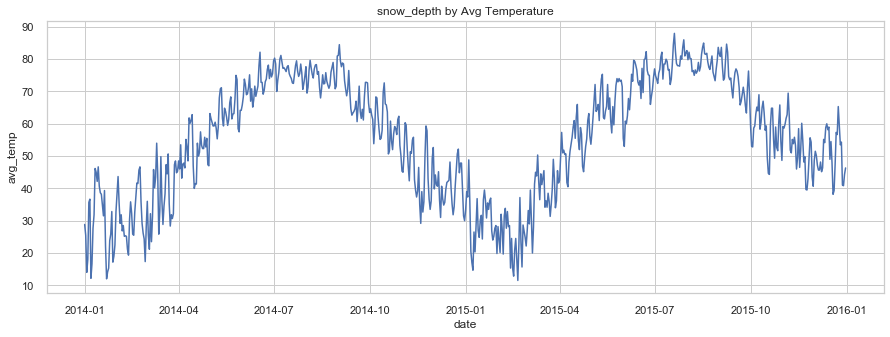

In [29]:
fig, ax = plt.subplots(figsize=(15,5))
m = sns.lineplot(x="date", y="avg_temp", data=weather_grouped, ax=ax)
ax.set(xlabel='date', ylabel='avg_temp')
#ax.set_xticks(np.arange(0, 24,1))
#plt.xticks(rotation=90);
plt.xticks
#plt.ylim(0, 18000)
plt.title('snow_depth by Avg Temperature');

In [31]:
path = 'DataSet/Parquets'
weather_grouped.to_parquet(path + '/weather_by_day.parquet', engine = 'pyarrow')